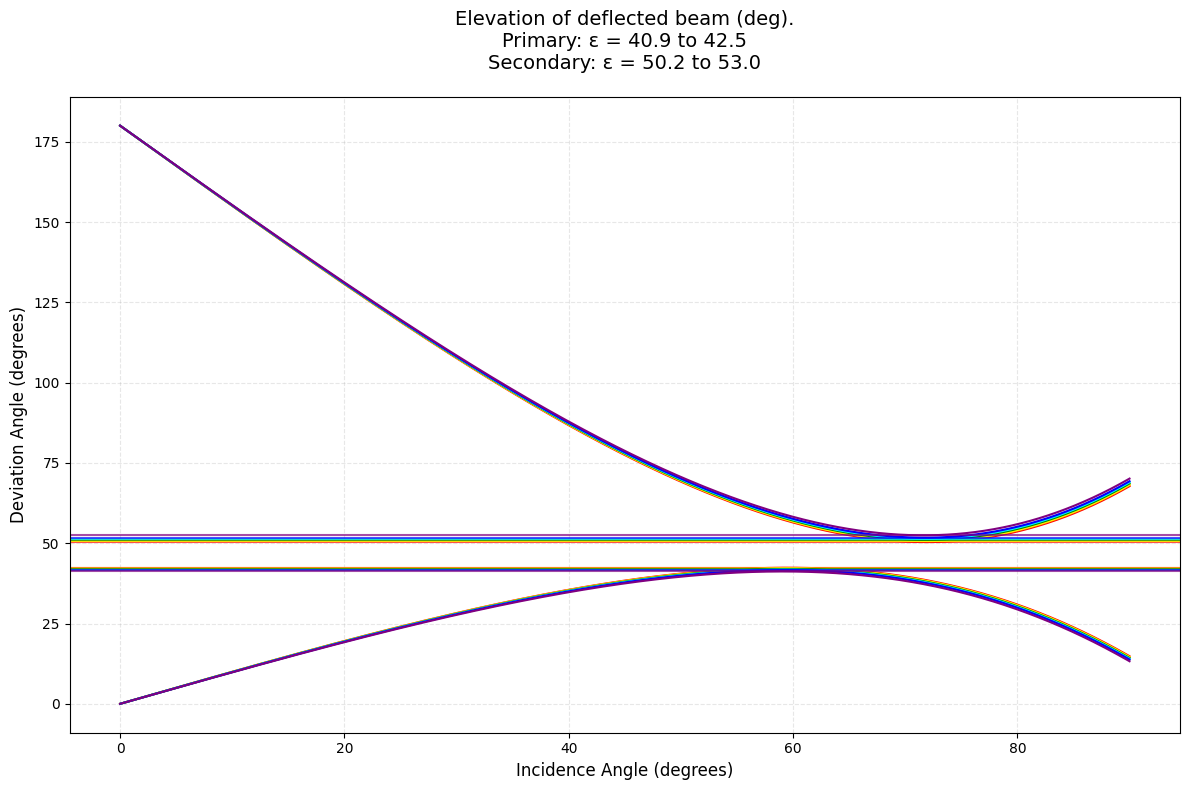

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

Theta = np.linspace(0, np.pi/2, 10000)
def convert(frequency, color_name):
    n = (1 + ((1 / (1.731 - 0.261*((frequency / 1000)**2))) ** 0.5)) ** 0.5
    Epsilon1 = np.pi - 6*np.arcsin(np.sin(Theta) / n) + 2*Theta
    Epsilon2 = 4*np.arcsin(np.sin(Theta) / n) - 2*Theta

    SpecialTheta1 = np.arcsin(((9-n**2)/8)**0.5)
    SpecialTheta2 = np.arcsin(((4-n**2)/3)**0.5)
    SpecialEpsilon1 = np.pi - 6*np.arcsin(np.sin(SpecialTheta1) / n) + 2*SpecialTheta1
    SpecialEpsilon2 = 4*np.arcsin(np.sin(SpecialTheta2) / n) - 2*SpecialTheta2
    return {
        'Epsilon1': np.rad2deg(Epsilon1),
        'Epsilon2': np.rad2deg(Epsilon2),
        'SpecialEpsilon1': np.rad2deg(SpecialEpsilon1),
        'SpecialEpsilon2': np.rad2deg(SpecialEpsilon2),
        'color': color_name,
        'frequency': f"{frequency} THz"
    }

colors = {
    'Red': convert(442.5, 'red'),
    'Orange': convert(495, 'orange'),
    'Yellow': convert(520, 'yellow'),
    'Green': convert(565, 'green'),
    'Cyan': convert(610, 'cyan'),
    'Blue': convert(650, 'blue'),
    'Violet': convert(735, 'purple')
}

Theta_deg = np.rad2deg(Theta)

for name, data in colors.items():
    plt.plot(Theta_deg, data['Epsilon1'], color=data['color'], linewidth=1.5,
             label=f"{name} {data['frequency']} (ε1)")
    plt.plot(Theta_deg, data['Epsilon2'], color=data['color'], linewidth=1.5,
             label=f"{name} {data['frequency']} (ε2)")
    plt.axhline(y=data['SpecialEpsilon1'], color=data['color'], alpha=0.7)
    plt.axhline(y=data['SpecialEpsilon2'], color=data['color'], alpha=0.7)

plt.xlabel('Incidence Angle (degrees)', fontsize=12)
plt.ylabel('Deviation Angle (degrees)', fontsize=12)
plt.title('Elevation of deflected beam (deg).\nPrimary: ε = {:.1f} to {:.1f}\nSecondary: ε = {:.1f} to {:.1f}'.format(
    convert(790, '')['SpecialEpsilon2'],
    convert(405, '')['SpecialEpsilon2'],
    convert(405, '')['SpecialEpsilon1'],
    convert(790, '')['SpecialEpsilon1']
), fontsize=14, pad=20)
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()